# Precios de la vivienda: Técnicas avanzadas de regresión

### Descripción del problema
> En este proyecto, trabajaremos con el dataset de la competencia de Kaggle ["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). El objetivo es predecir el precio de las viviendas en Ames, Iowa, utilizando técnicas avanzadas de regresión. Este dataset contiene 79 variables explicativas que describen aspectos de las viviendas, como el tamaño, la ubicación, la calidad de construcción, entre otros.

### Objetivo
> Construir un modelo de regresión que prediga con precisión el precio de las viviendas (`SalePrice`) basado en las características proporcionadas.


## Descripción de las variables

A continuación se describe cada una de las variables presentes en el dataset:

### Variables categóricas:

1. **MSSubClass**: Identifica el tipo de vivienda involucrada en la venta.
   - Ejemplos: 1-STORY 1946 & NEWER ALL STYLES, 2-STORY 1945 & OLDER, etc.

2. **MSZoning**: Clasificación general de zonificación.
   - Ejemplos: Agriculture (A), Residential Low Density (RL), Commercial (C), etc.

3. **Street**: Tipo de acceso vial a la propiedad.
   - Valores: Paved (Pave), Gravel (Grvl).

4. **Alley**: Tipo de acceso por callejón.
   - Valores: Paved (Pave), Gravel (Grvl), No alley access (NA).

5. **LotShape**: Forma general del terreno.
   - Valores: Regular (Reg), Irregular (IR1, IR2, IR3).

6. **LandContour**: Planitud del terreno.
   - Valores: Near Flat/Level (Lvl), Banked (Bnk), Hillside (HLS), Depression (Low).

7. **Utilities**: Tipo de servicios públicos disponibles.
   - Valores: All public Utilities (AllPub), Electricity and Gas Only (NoSeWa), etc.

8. **LotConfig**: Configuración del terreno.
   - Valores: Inside lot, Corner lot, Cul-de-sac, etc.

9. **LandSlope**: Pendiente del terreno.
   - Valores: Gentle slope (Gtl), Moderate Slope (Mod), Severe Slope (Sev).

10. **Neighborhood**: Ubicación física dentro de los límites de la ciudad de Ames.
    - Ejemplos: Bloomington Heights (Blmngtn), Northridge (NoRidge), Old Town (OldTown), etc.

11. **Condition1** y **Condition2**: Proximidad a varias condiciones (como calles arteriales, vías férreas, etc.).
    - Ejemplos: Normal (Norm), Adjacent to arterial street (Artery), etc.

12. **BldgType**: Tipo de vivienda.
    - Valores: Single-family Detached (1Fam), Duplex (Duplx), Townhouse (TwnhsE, TwnhsI), etc.

13. **HouseStyle**: Estilo de la vivienda.
    - Valores: One story (1Story), Two story (2Story), Split Foyer (SFoyer), etc.

14. **RoofStyle** y **RoofMatl**: Estilo y material del techo.
    - Ejemplos: Gable, Hip, Flat, Clay Tile, Metal, etc.

15. **Exterior1st** y **Exterior2nd**: Materiales de revestimiento exterior.
    - Ejemplos: Vinyl Siding, Brick Face, Wood Siding, etc.

16. **MasVnrType**: Tipo de revestimiento de mampostería.
    - Valores: Brick Face, Stone, None, etc.

17. **Foundation**: Tipo de cimentación.
    - Valores: Poured Concrete (PConc), Cinder Block (CBlock), Slab, etc.

18. **Heating** y **HeatingQC**: Tipo de calefacción y su calidad.
    - Ejemplos: Gas forced warm air furnace (GasA), Excellent (Ex), Good (Gd), etc.

19. **CentralAir**: Aire acondicionado central.
    - Valores: Yes (Y), No (N).

20. **Electrical**: Sistema eléctrico.
    - Valores: Standard Circuit Breakers (SBrkr), Fuse Box (FuseA, FuseF), etc.

21. **GarageType**, **GarageFinish**, **GarageQual**, **GarageCond**: Tipo, acabado, calidad y condición del garaje.
    - Ejemplos: Attached (Attchd), Detached (Detchd), Finished (Fin), etc.

22. **PavedDrive**: Tipo de entrada pavimentada.
    - Valores: Paved (Y), Partial Pavement (P), Dirt/Gravel (N).

23. **SaleType** y **SaleCondition**: Tipo y condición de la venta.
    - Ejemplos: Warranty Deed (WD), New (New), Normal Sale (Normal), etc.

### Variables numéricas:

1. **LotFrontage**: Metros lineales de calle conectados a la propiedad.

2. **LotArea**: Tamaño del terreno en metros cuadrados.

3. **MasVnrArea**: Área de revestimiento de mampostería en metros cuadrados.

4. **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**: Área terminada y sin terminar del sótano en metros cuadrados.

5. **1stFlrSF**, **2ndFlrSF**, **GrLivArea**: Área habitable en metros cuadrados (primer piso, segundo piso y total).

6. **GarageCars**, **GarageArea**: Capacidad del garaje en número de autos y área en metros cuadrados.

7. **WoodDeckSF**, **OpenPorchSF**, **EnclosedPorch**, **3SsnPorch**, **ScreenPorch**: Áreas de terrazas y porches en metros cuadrados.

8. **PoolArea**: Área de la piscina en metros cuadrados.

9. **MiscVal**: Valor de características misceláneas (como cobertizos o canchas de tenis).

10. **MoSold**, **YrSold**: Mes y año de la venta.

### Variable objetivo:

1. **SalePrice**: Precio de venta de la vivienda (en dólares). Esta es la variable que queremos predecir.

# Librerias

In [1]:
import pandas as pd
import kaggle
import zipfile

from utils_EDA import analizar_columna_num

# Datos

In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

In [4]:
data_train = pd.read_csv('../data/train.csv')
data_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
data_train.shape

(1460, 81)

# EDA

In [6]:
data_train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
data_train.describe(include=['int64', 'float64'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Datos Faltantes

In [8]:
null_counts = (data_train.isnull().sum() / len(data_train)) * 100
null_counts[null_counts > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

> **Existen variables con un alto porcentaje de datos nulos o faltantes, así como otras con un porcentaje menor, las cuales pueden ser tratadas posteriormente mediante técnicas de imputación o ajuste según su relevancia en el análisis.**

#### Datos Duplicados

In [9]:
data_train.duplicated().any()

False

> **No existen datos duplicados**

## Variable Numérica

In [10]:
datos_num =data_train.select_dtypes(include=['float64', 'int64'])
datos_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [20]:
name_col_num = datos_num.columns.to_list()

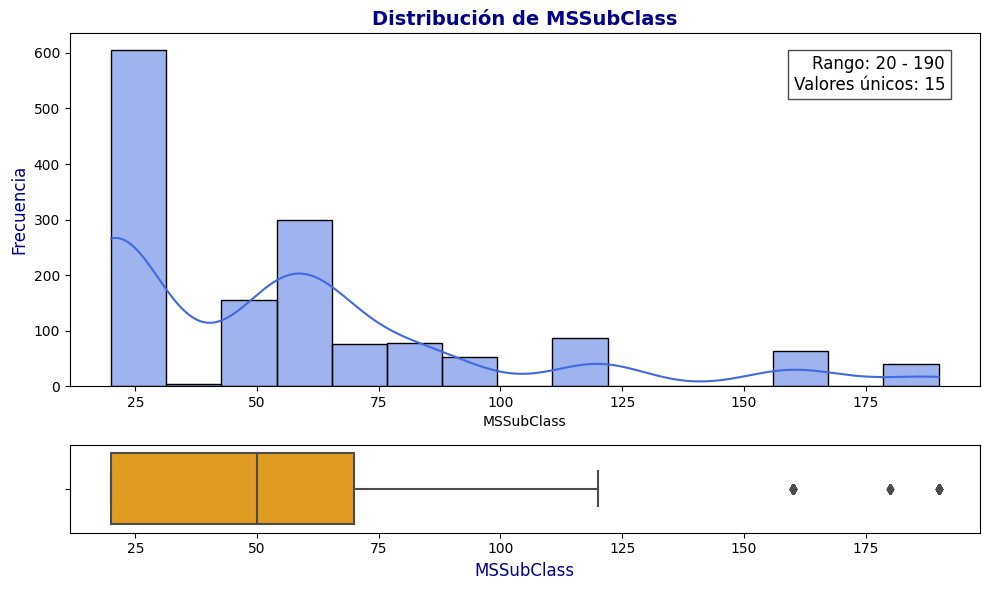

In [19]:
analizar_columna_num(name_col_num[1], datos_num)

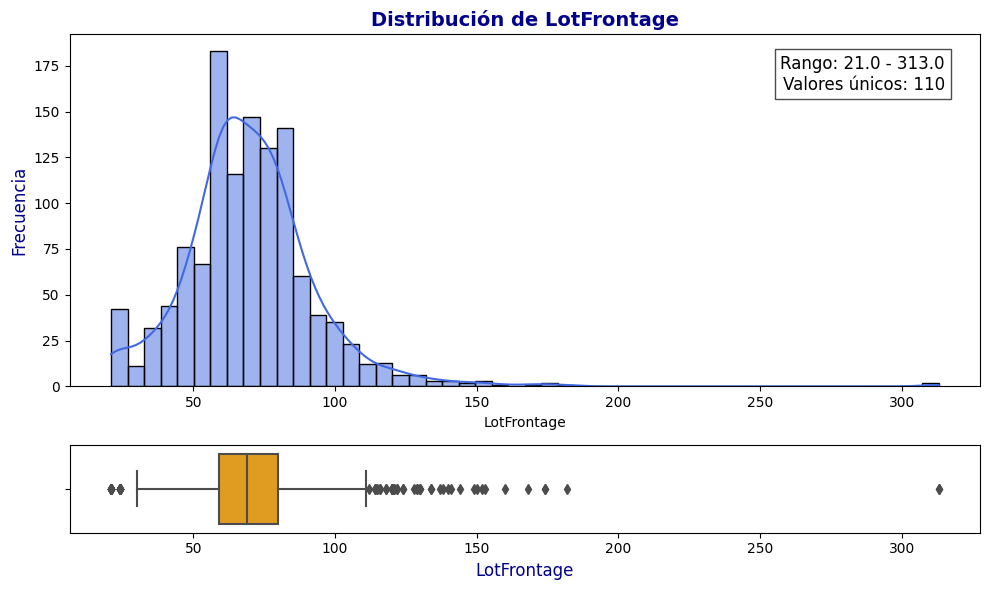

In [21]:
analizar_columna_num(name_col_num[2], datos_num)

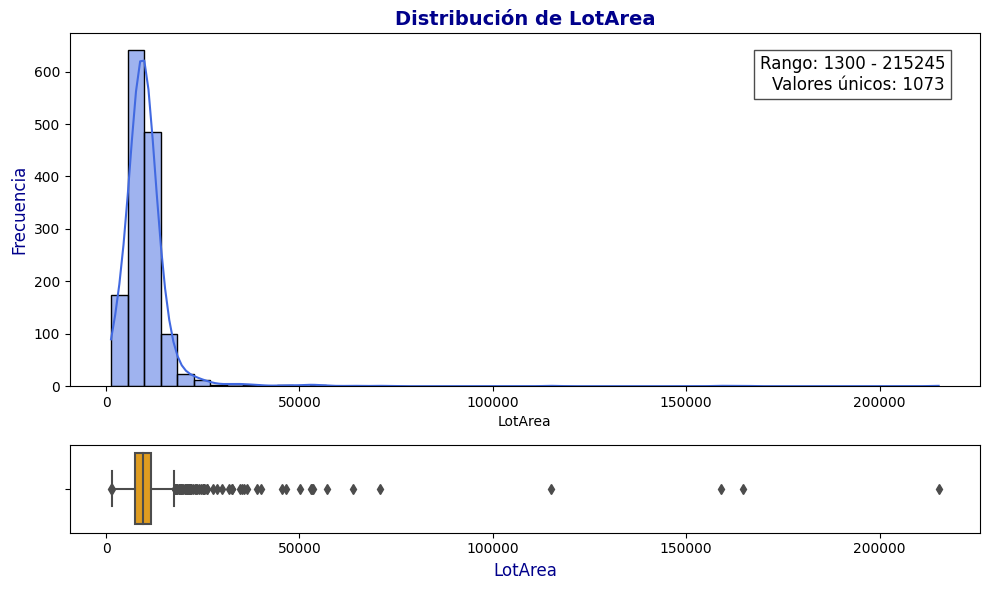

In [24]:
analizar_columna_num(name_col_num[3], datos_num)

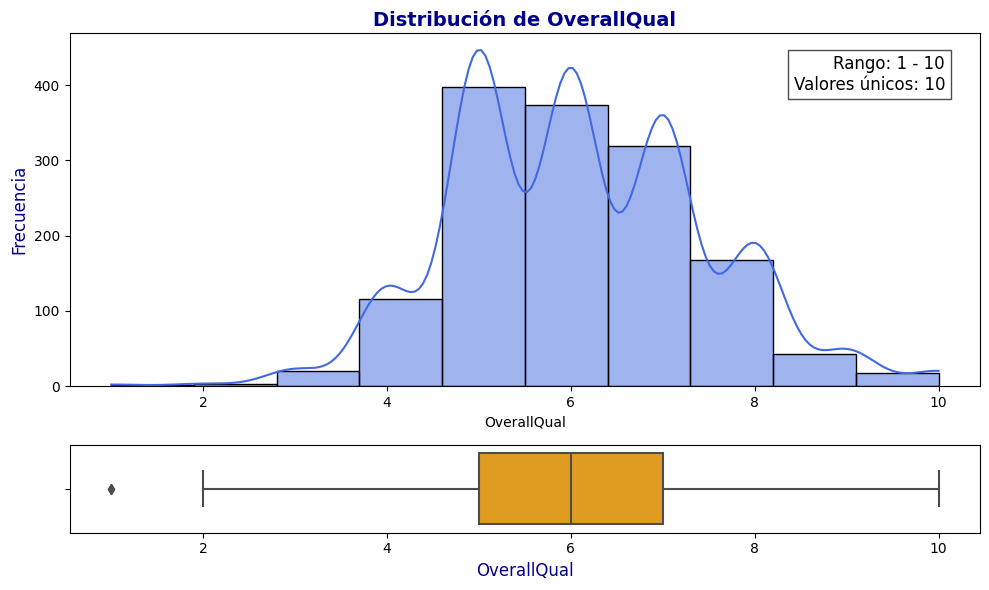

In [25]:
analizar_columna_num(name_col_num[4], datos_num)

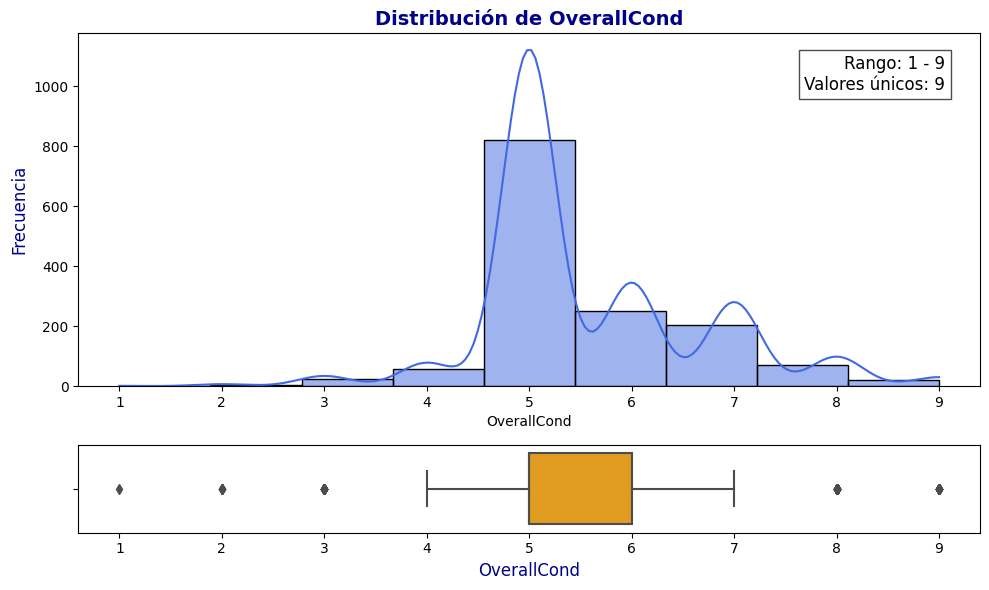

In [26]:
analizar_columna_num(name_col_num[5], datos_num)

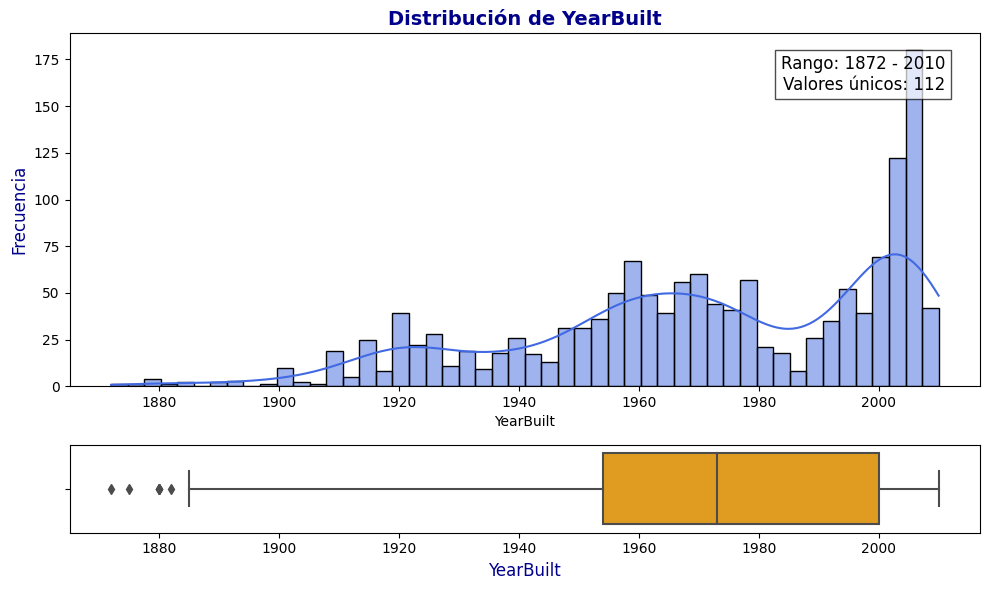

In [27]:
analizar_columna_num(name_col_num[6], datos_num)

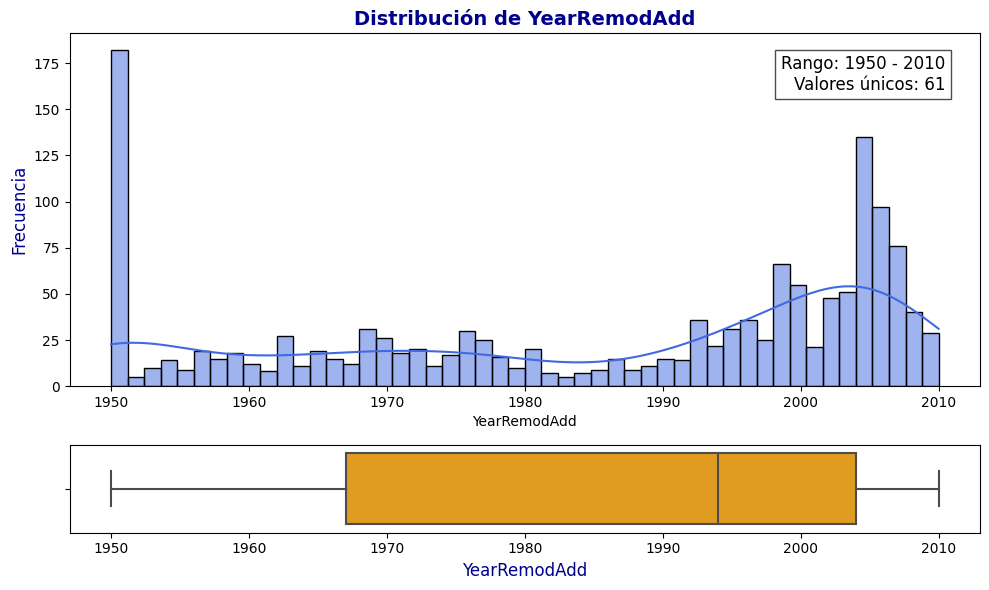

In [28]:
analizar_columna_num(name_col_num[7], datos_num)

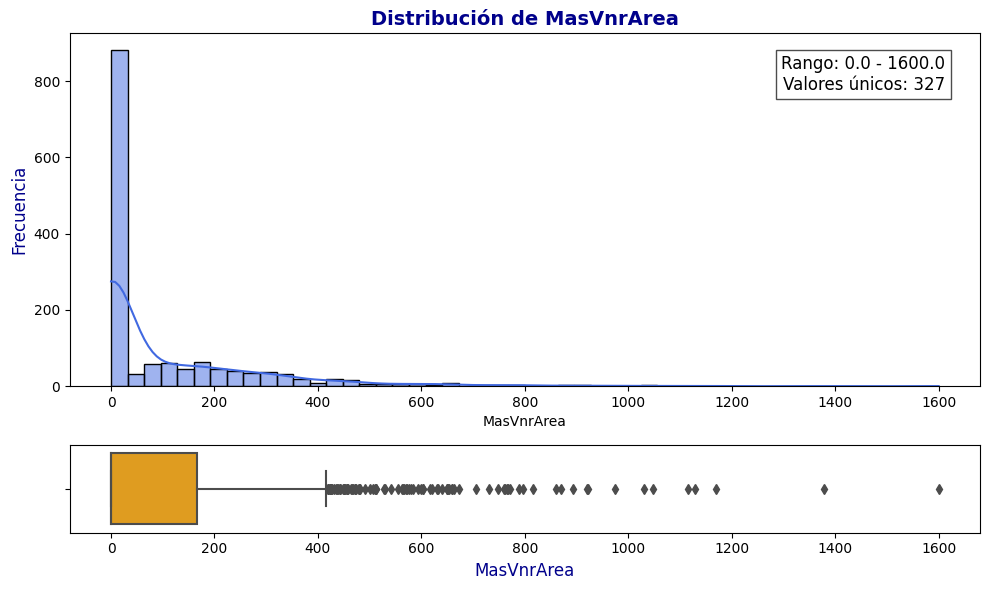

In [29]:
analizar_columna_num(name_col_num[8], datos_num)

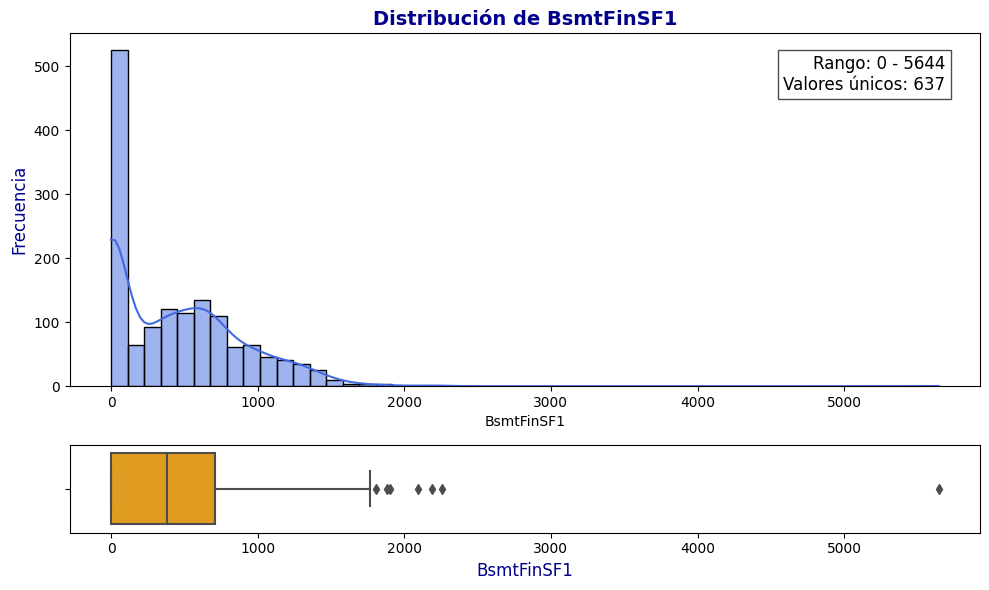

In [30]:
analizar_columna_num(name_col_num[9], datos_num)

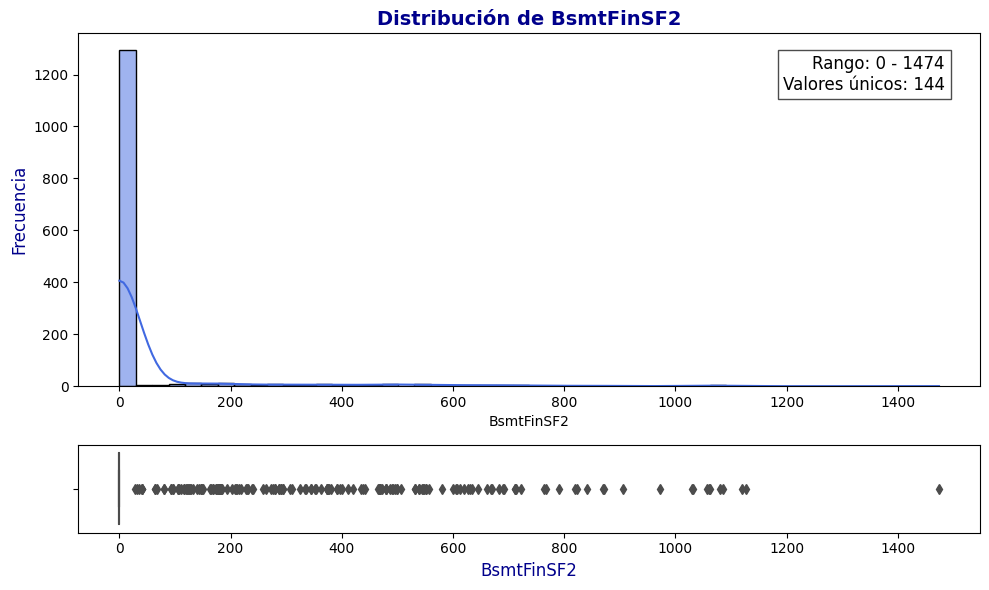

In [31]:
analizar_columna_num(name_col_num[10], datos_num)

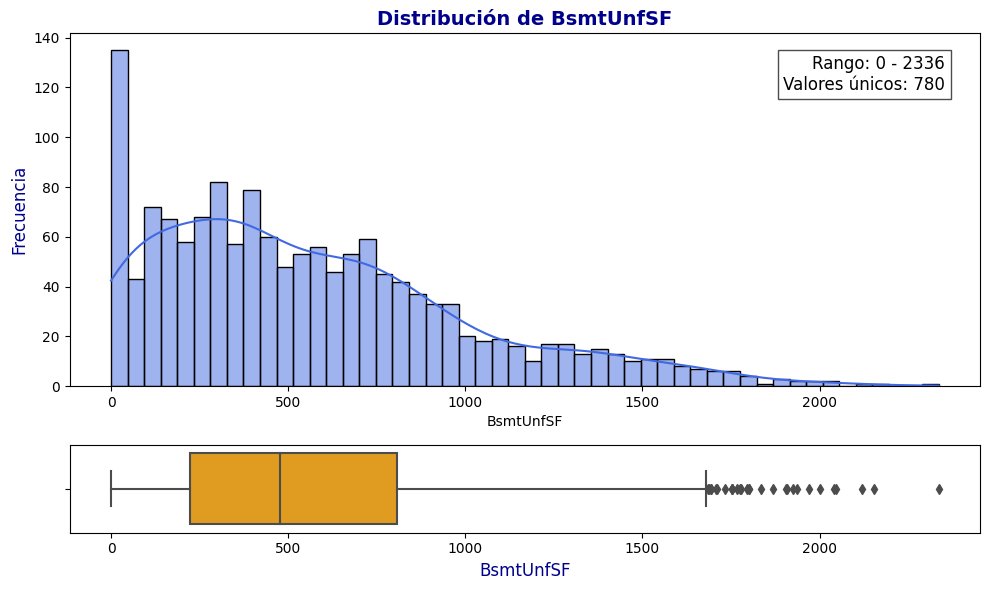

In [32]:
analizar_columna_num(name_col_num[11], datos_num)

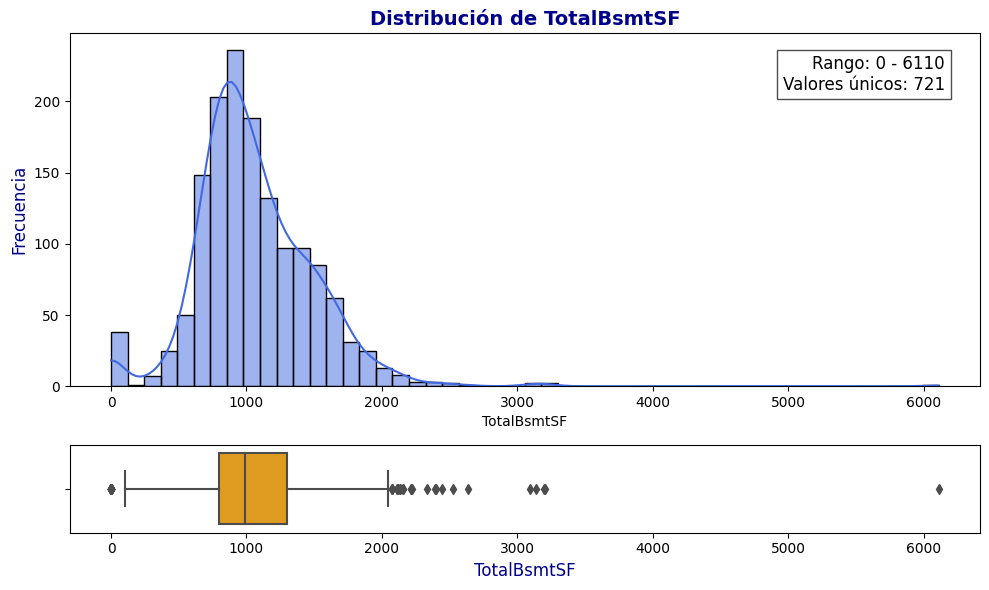

In [33]:
analizar_columna_num(name_col_num[12], datos_num)

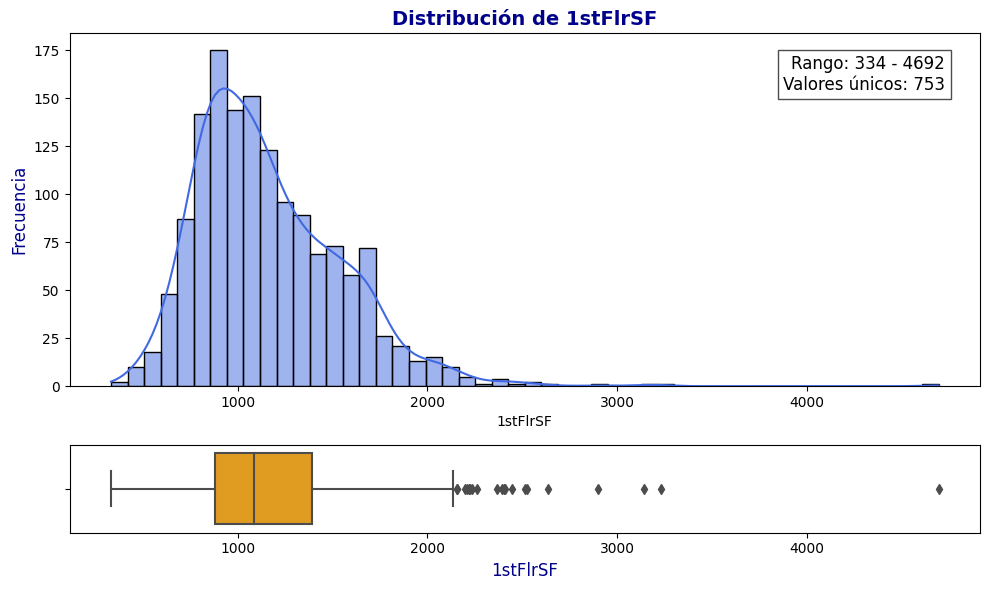

In [34]:
analizar_columna_num(name_col_num[13], datos_num)

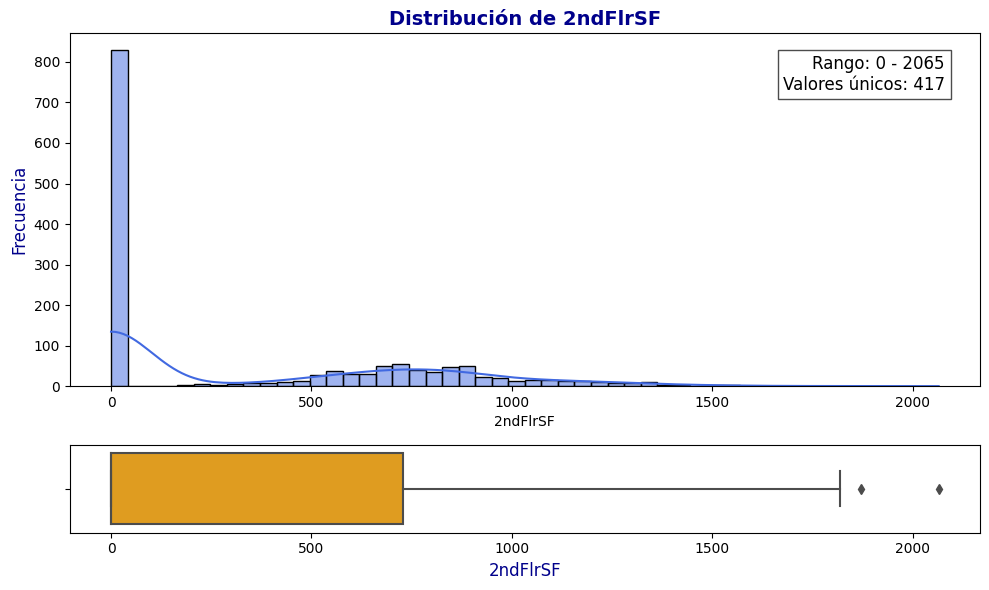

In [35]:
analizar_columna_num(name_col_num[14], datos_num)

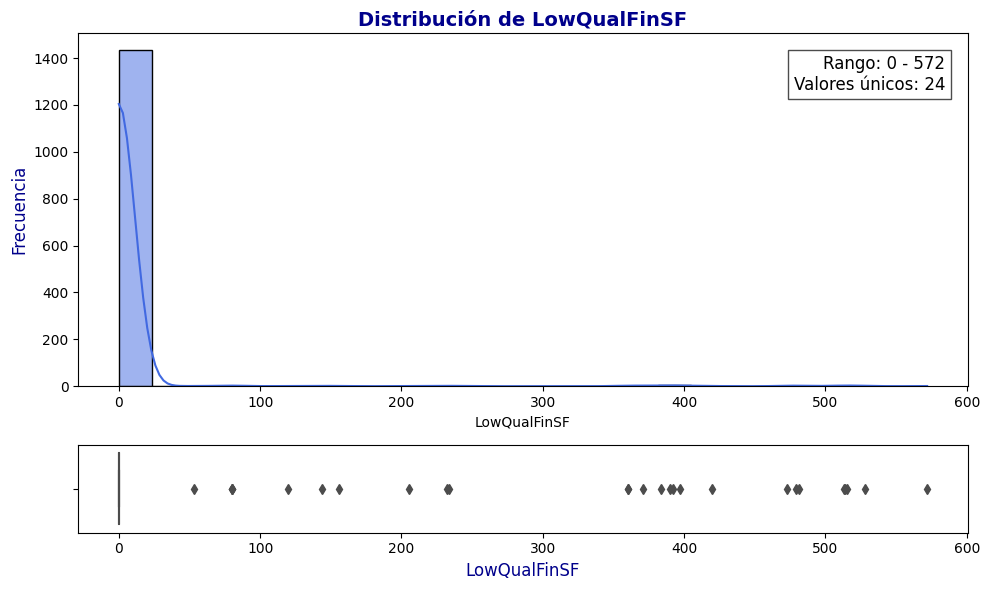

In [36]:
analizar_columna_num(name_col_num[15], datos_num)

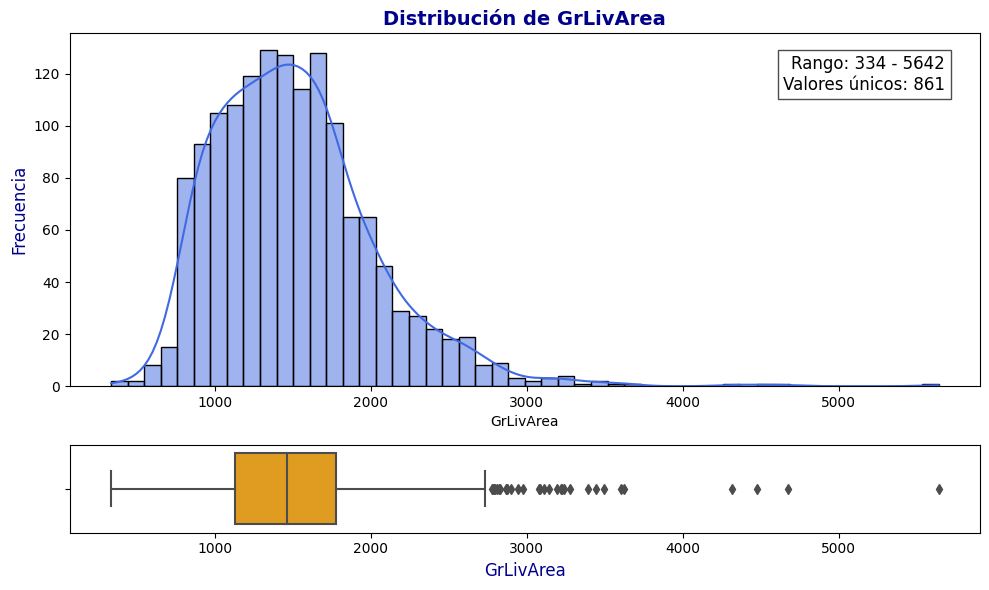

In [37]:
analizar_columna_num(name_col_num[16], datos_num)

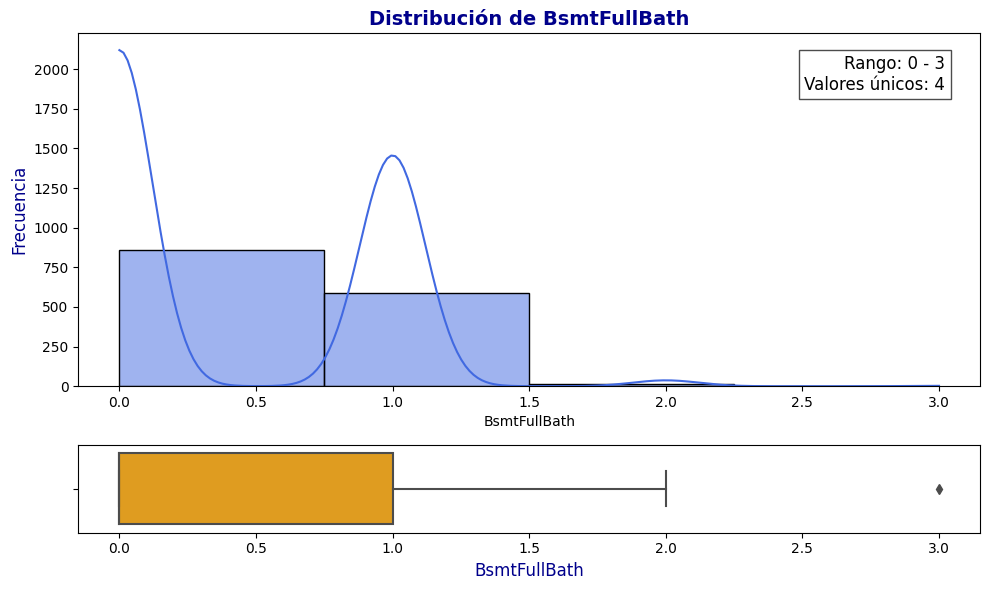

In [38]:
analizar_columna_num(name_col_num[17], datos_num)

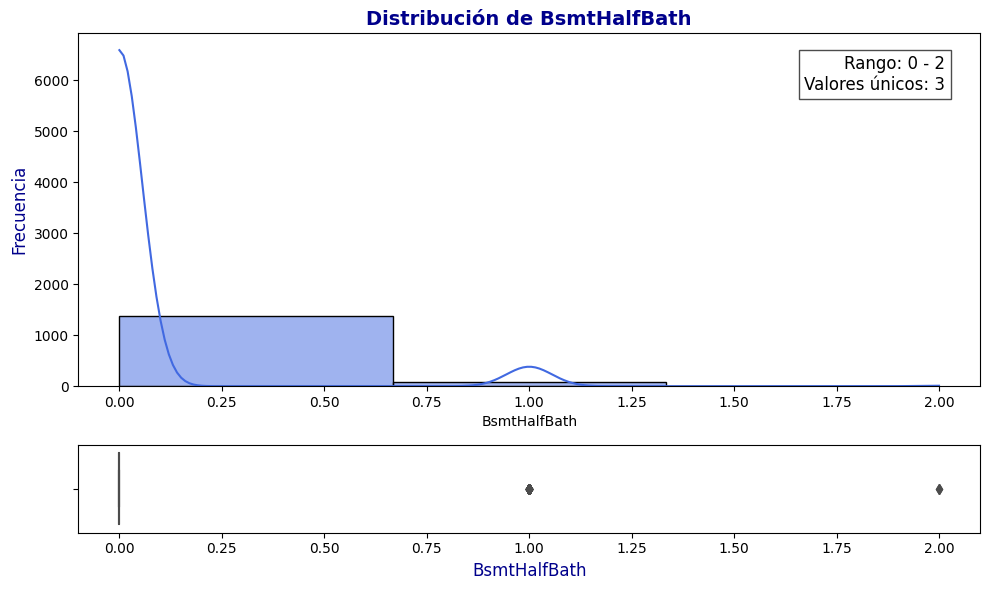

In [39]:
analizar_columna_num(name_col_num[18], datos_num)

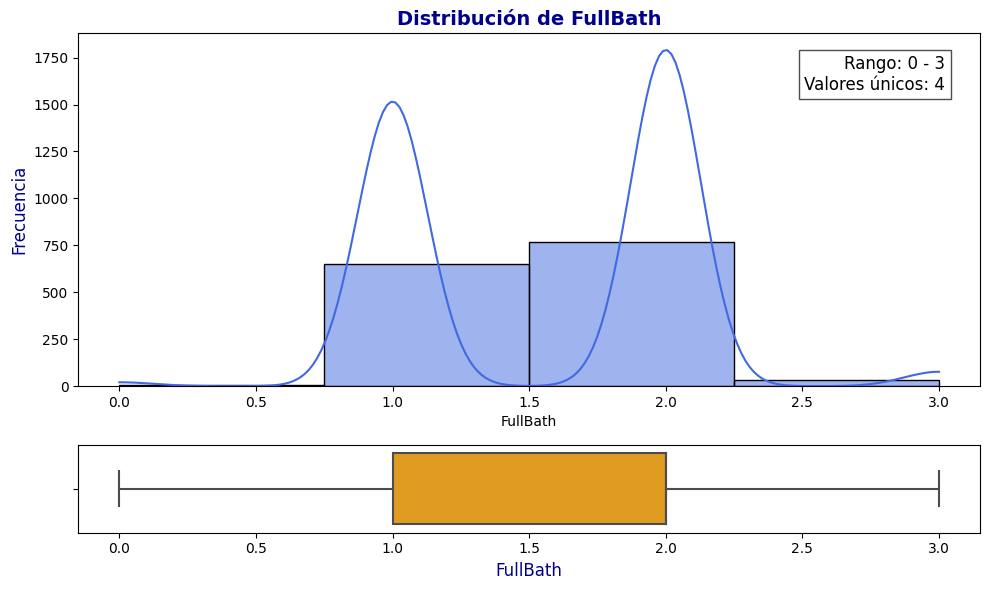

In [40]:
analizar_columna_num(name_col_num[19], datos_num)

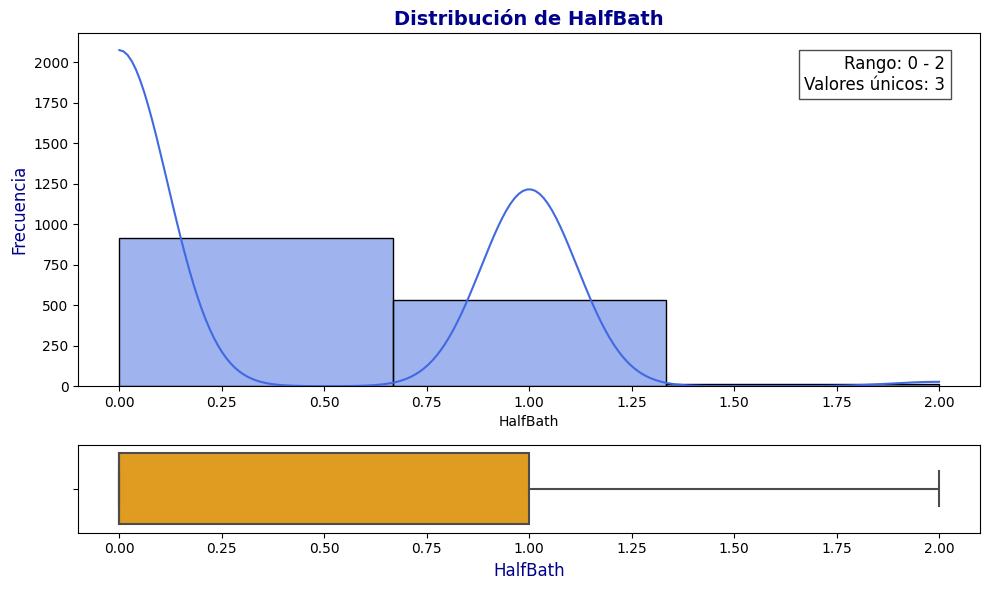

In [41]:
analizar_columna_num(name_col_num[20], datos_num)

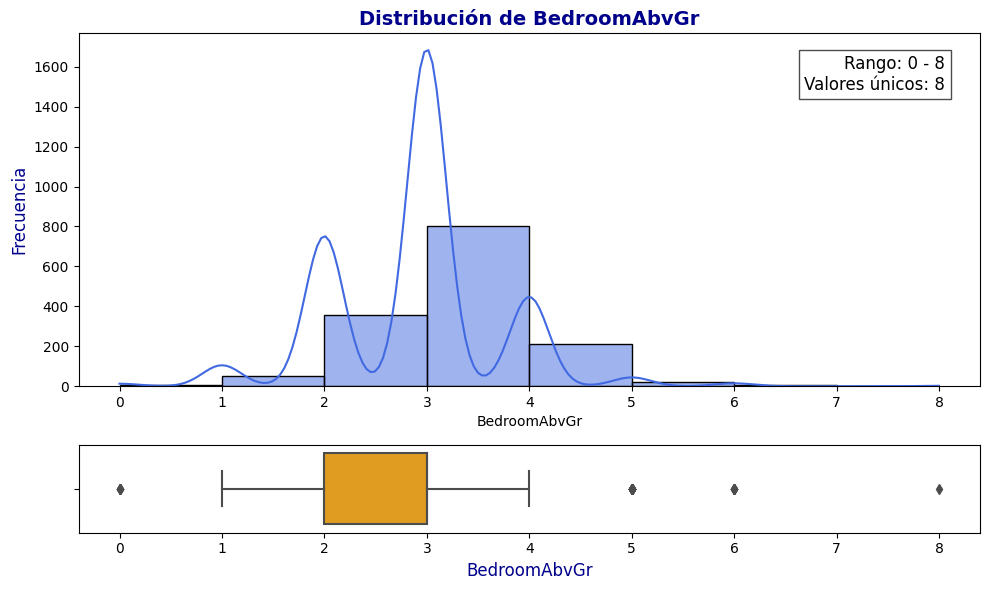

In [42]:
analizar_columna_num(name_col_num[21], datos_num)

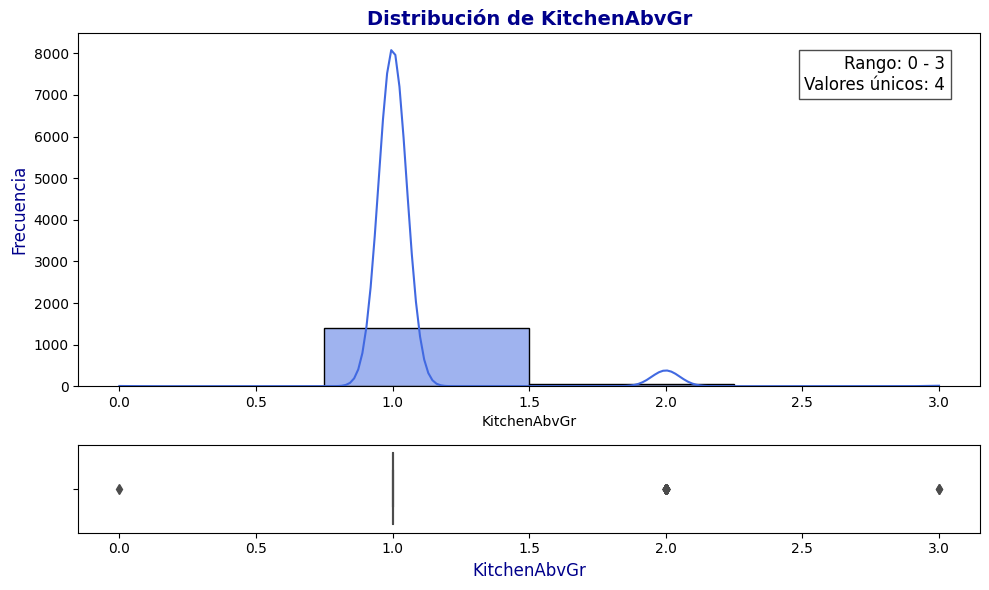

In [43]:
analizar_columna_num(name_col_num[22], datos_num)

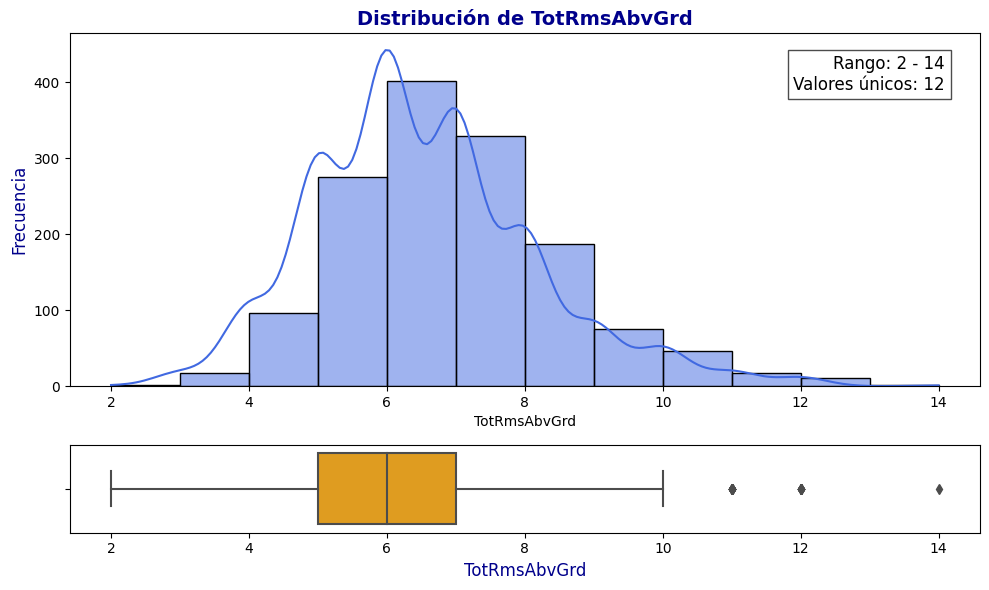

In [44]:
analizar_columna_num(name_col_num[23], datos_num)

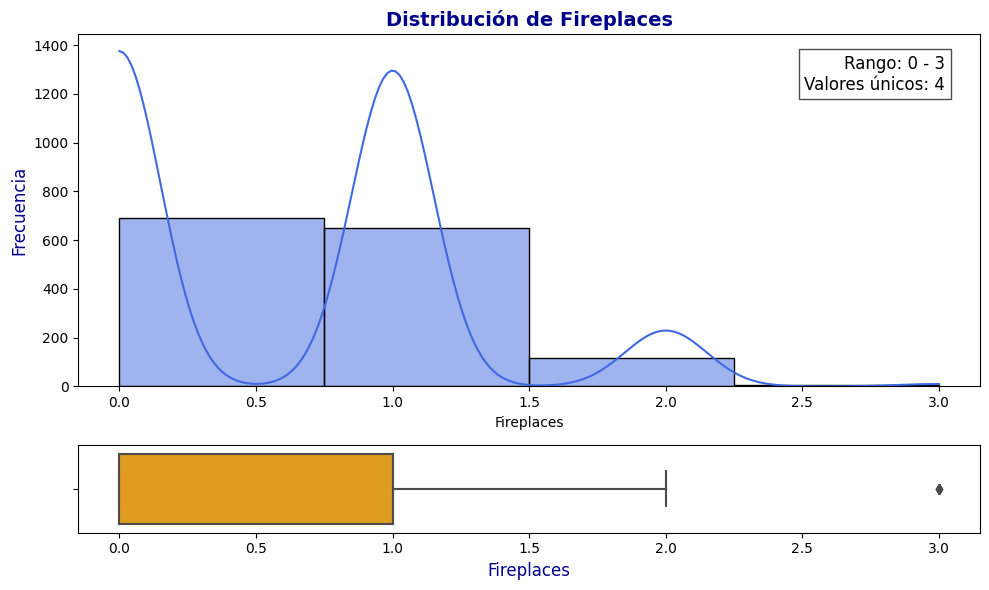

In [45]:
analizar_columna_num(name_col_num[24], datos_num)

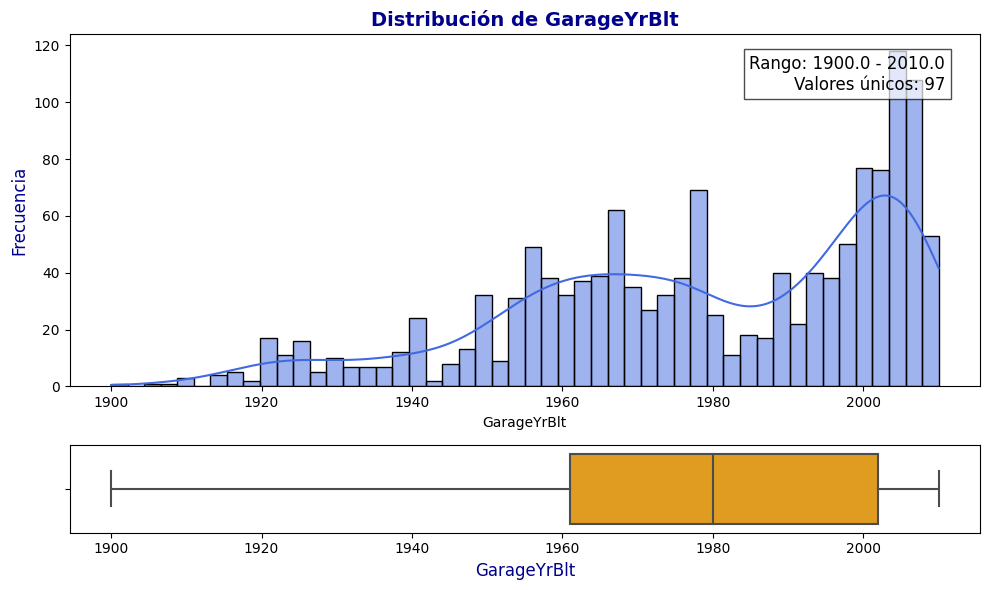

In [46]:
analizar_columna_num(name_col_num[25], datos_num)

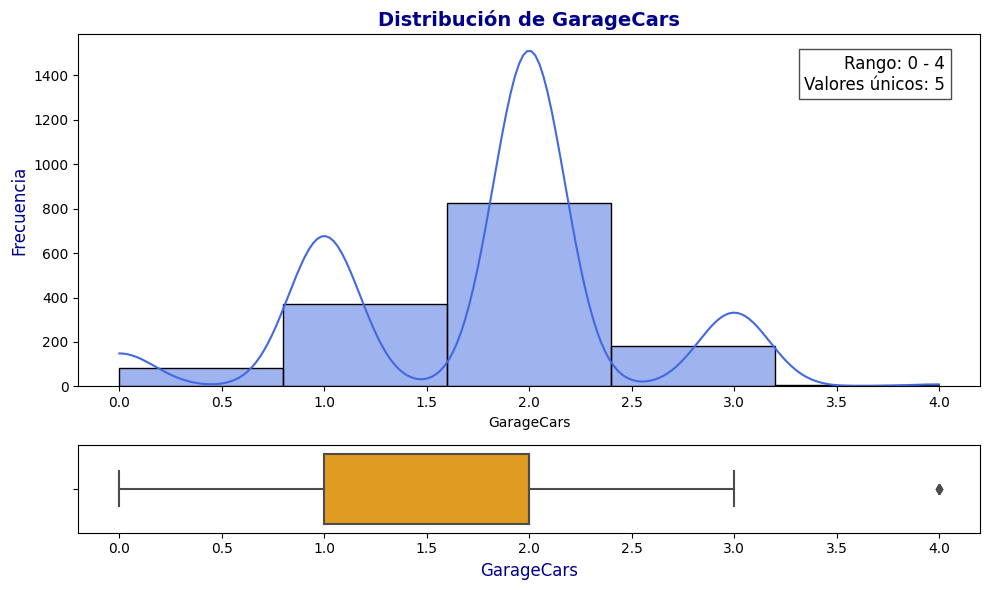

In [47]:
analizar_columna_num(name_col_num[26], datos_num)

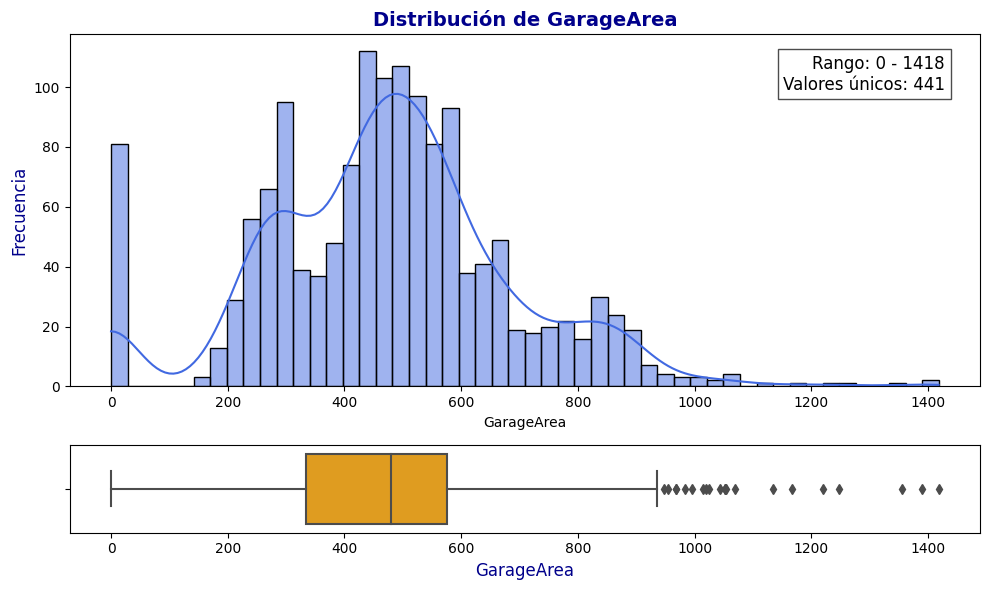

In [48]:
analizar_columna_num(name_col_num[27], datos_num)

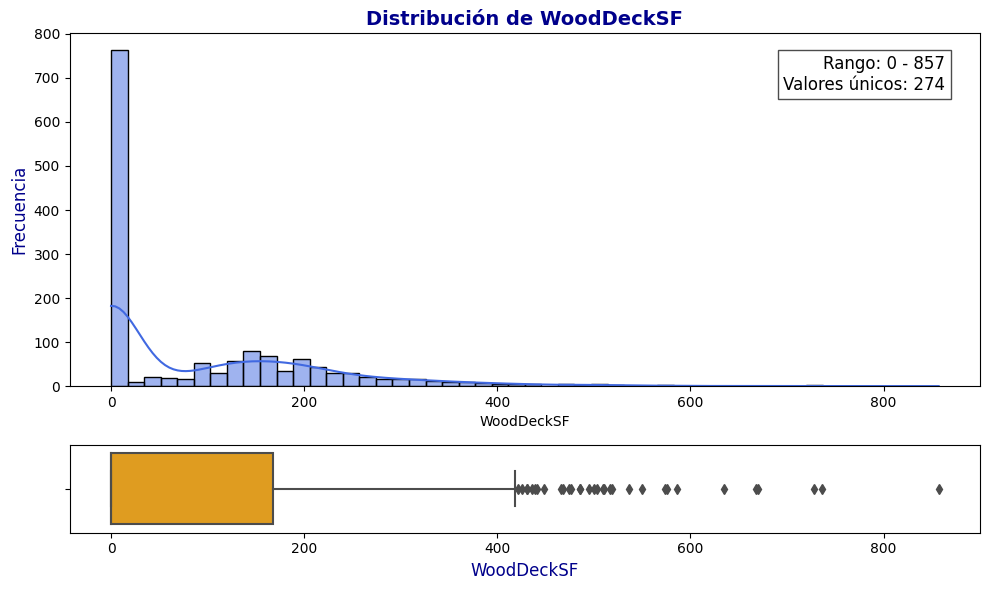

In [49]:
analizar_columna_num(name_col_num[28], datos_num)

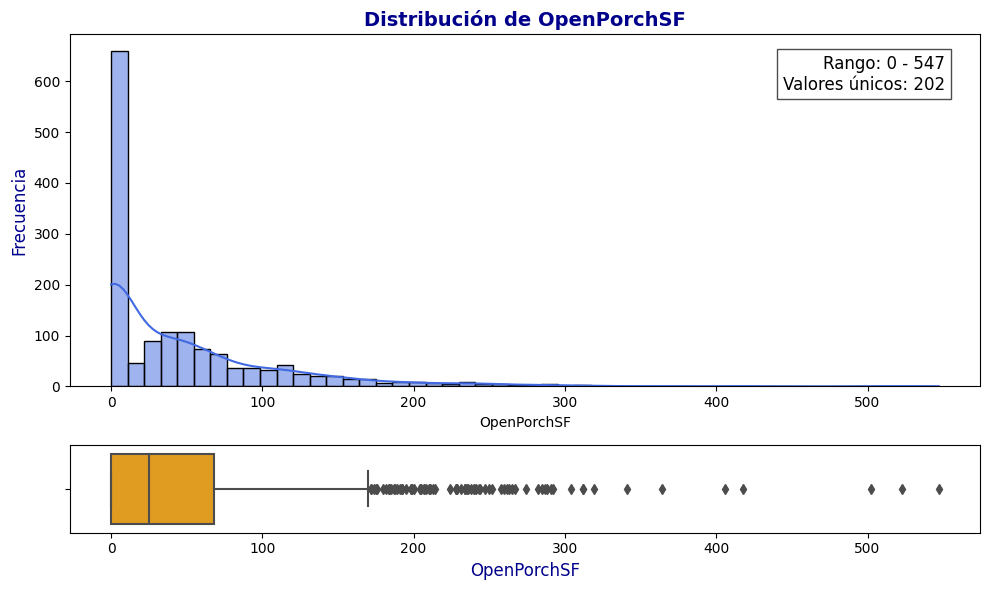

In [50]:
analizar_columna_num(name_col_num[29], datos_num)

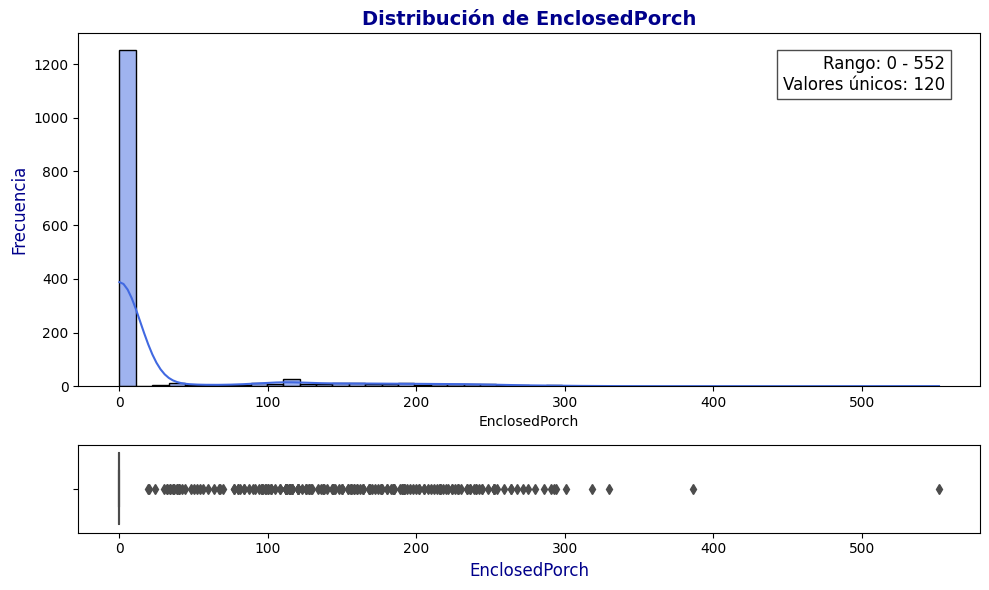

In [51]:
analizar_columna_num(name_col_num[30], datos_num)

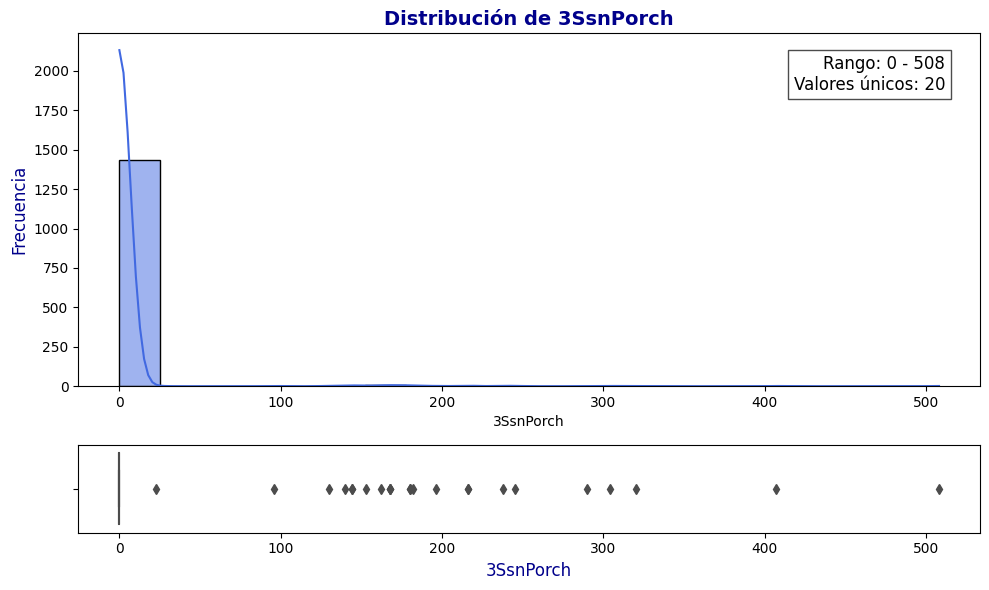

In [52]:
analizar_columna_num(name_col_num[31], datos_num)

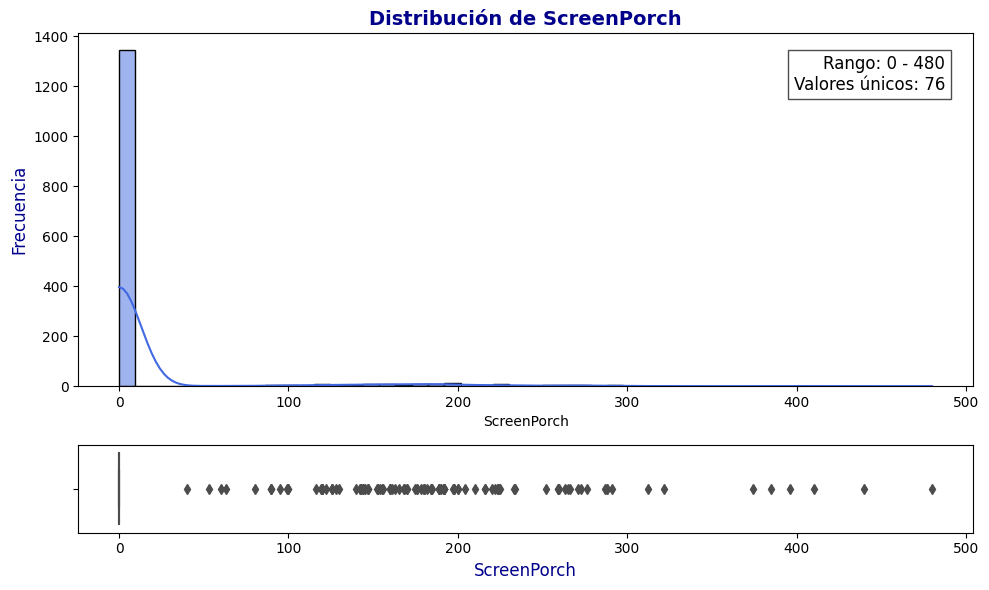

In [53]:
analizar_columna_num(name_col_num[32], datos_num)

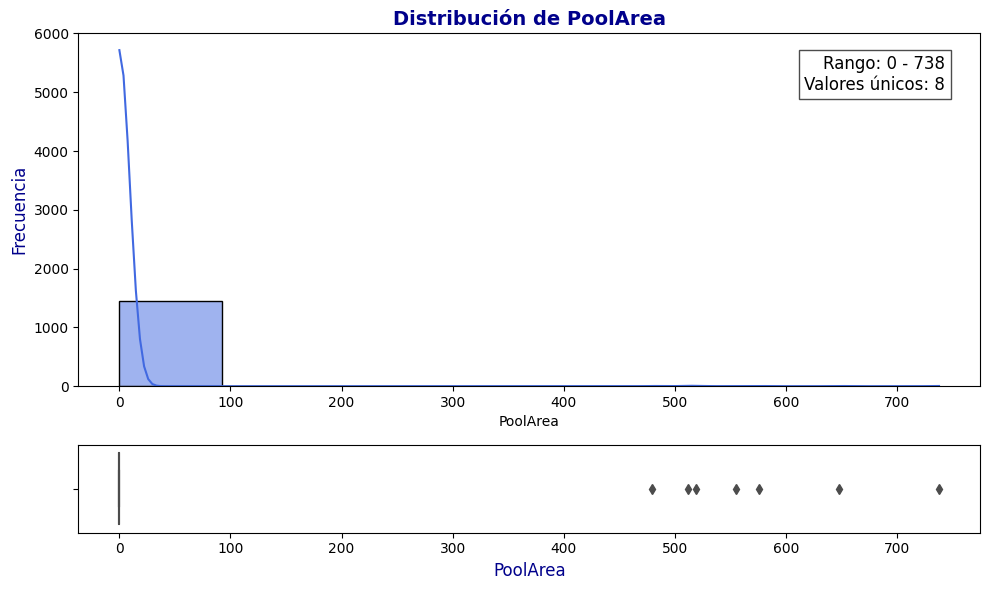

In [54]:
analizar_columna_num(name_col_num[33], datos_num)

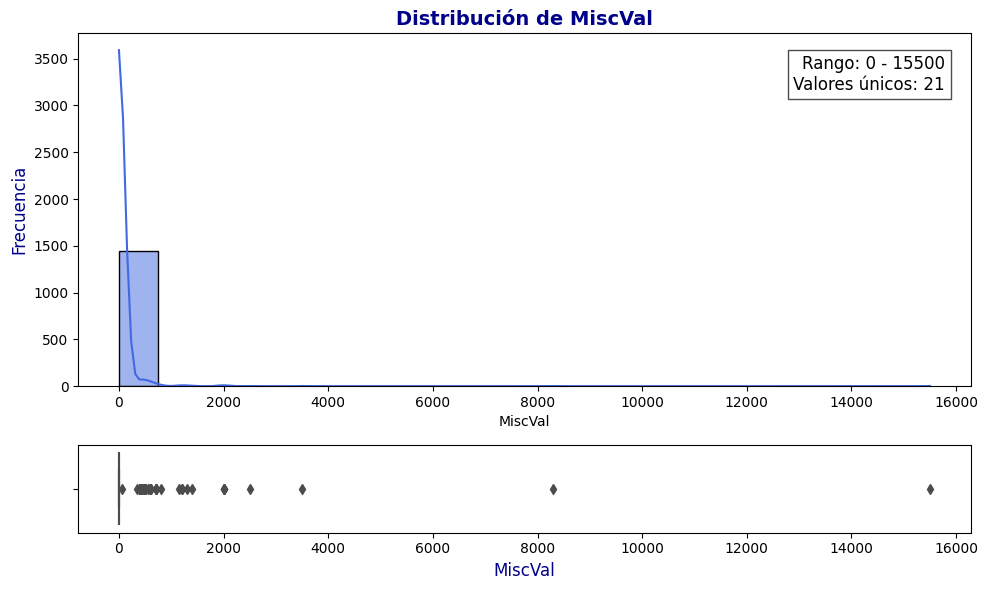

In [55]:
analizar_columna_num(name_col_num[34], datos_num)

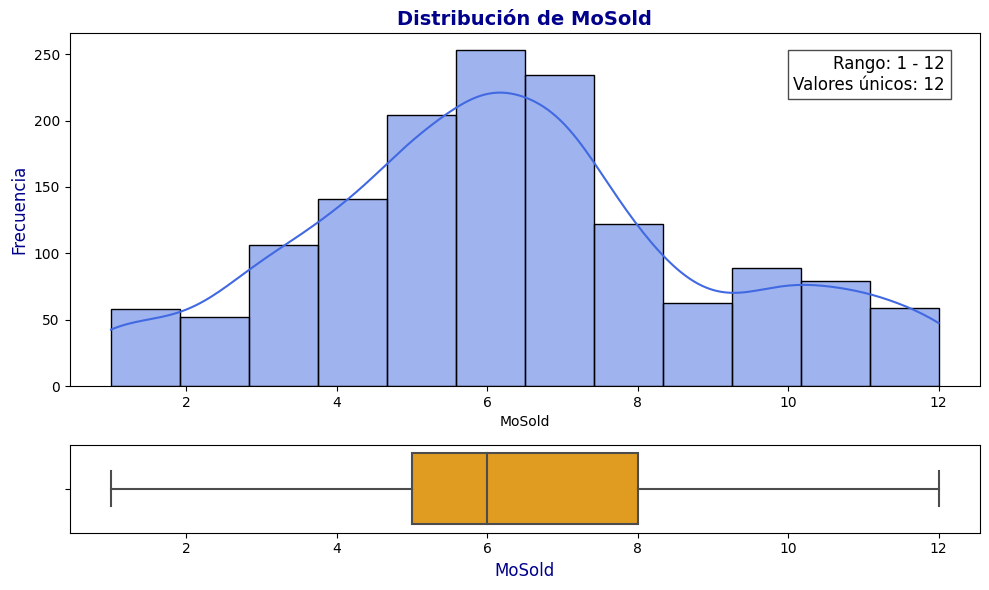

In [56]:
analizar_columna_num(name_col_num[35], datos_num)

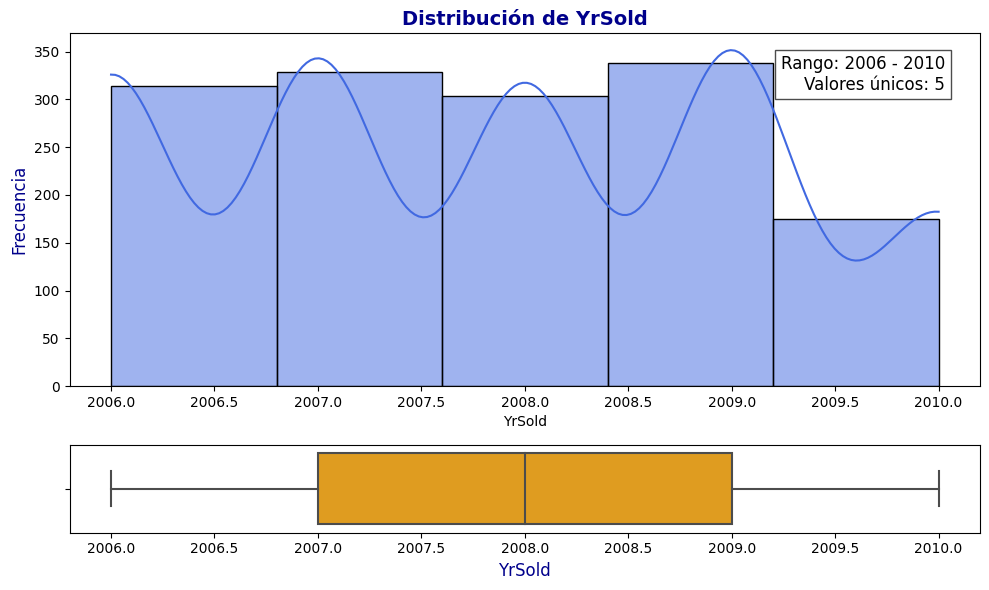

In [57]:
analizar_columna_num(name_col_num[36], datos_num)

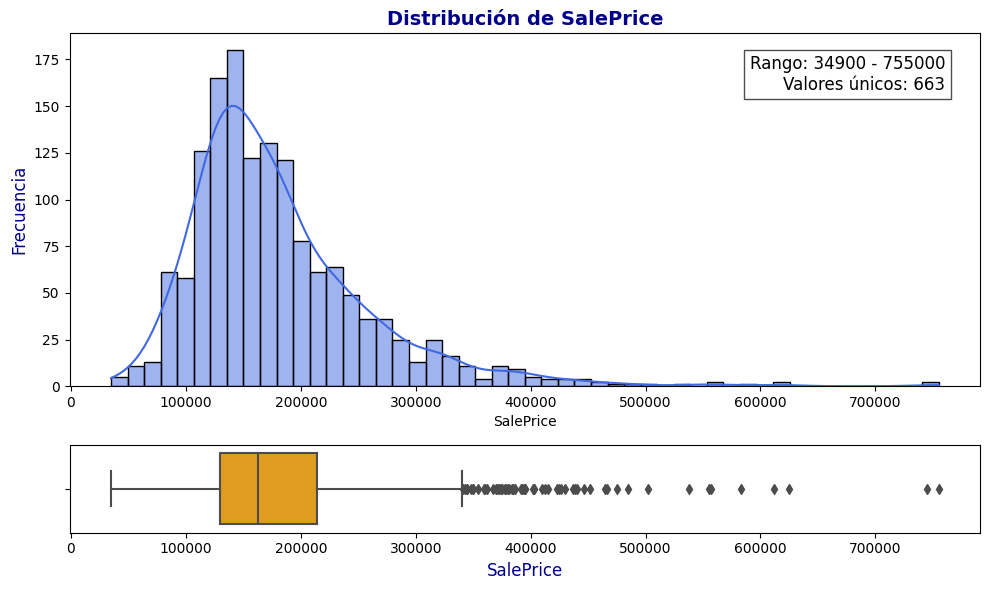

In [58]:
analizar_columna_num(name_col_num[37], datos_num)

## Variables Categóricas

## Variable Objetivo

## Relación entre Variables

# Conclución

#### Datos Faltantes

> Existen varias variables con un alto porcentaje de datos faltantes o nulos. Algunas de ellas serán eliminadas debido a su elevado porcentaje de ausencia, mientras que aquellas con un menor porcentaje de datos faltantes podrán ser imputadas, dependiendo de su importancia en el modelo.